In [32]:
import re
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pal = sns.color_palette()

In [33]:
df = pd.read_csv('complaints.csv')
df.head(10)

,text,type,created_at
0,Fiz uma compra melo site da Livraria Saraiva. ...,badservice,2017-07-27T19:06:11
1,Fiz a compra no dia 14/07/2017 e recebi um e-m...,badservice,2017-07-17T11:12:30
2,"Olá, fiz uma compra em 10/07/2017. Pedido: 308...",badservice,2017-07-17T00:22:43
3,Efetuei compra de uma multifuncional no site d...,badservice,2017-07-14T18:37:33
4,Meu pedido está com o status &quot;PROBLEMAS F...,badservice,2017-07-14T03:17:24
5,"Bom, <br /><br />Já fiz compra pela Saravia e ...",badservice,2017-07-13T09:22:08
6,Boa tarde. Após várias tentativas para reativa...,badservice,2017-07-12T14:05:22
7,"Fiz uma reclamação do pedido 306349670, refere...",badservice,2017-07-10T14:04:10
8,Havia realizado uma compra de 4 livros no dia ...,badservice,2017-07-06T11:33:54
9,pedido 305774465 pago no debito porem o status...,badservice,2017-07-03T01:19:49


In [34]:
def rm_stopwords(text):
    words = word_tokenize(text, 'portuguese')
    stopwords_list = stopwords.words('portuguese') + [ ',', '<', '>', '?', ':', '$', '!', '(', ')', '.', '&', '*', '"', '\'', ';' ]
    return ' '.join([ w.lower() for w in words if w not in stopwords_list])

def clean_text(text):
    text = re.sub('[\d{2}\/\d{2}\/?\d{4}?]', ' ', text)
    text = re.sub('www\.(\w+\.?)*', ' ', text)
    text = text.replace('br', '')
    return text

def stemm(text):
    stemmer = RSLPStemmer()
    words = word_tokenize(text, 'portuguese')
    return ' '.join([stemmer.stem(w) for w in words if w not in stopwords.words('portuguese')])

df['text'] = df['text'].apply(rm_stopwords)
df['text'] = df['text'].apply(lambda x: BeautifulSoup(x, "lxml").get_text())
df['text'] = df['text'].apply(clean_text)
df.head(100)

,text,type,created_at
0,fiz compra melo site livraria depois umas du...,badservice,2017-07-27T19:06:11
1,fiz compra dia recebi e-mail solici...,badservice,2017-07-17T11:12:30
2,olá fiz compra pedido ...,badservice,2017-07-17T00:22:43
3,efetuei compra multifuncional site ...,badservice,2017-07-14T18:37:33
4,meu pedido status quot problemas fiscais quot ...,badservice,2017-07-14T03:17:24
5,bom já fiz compra saravia entregaram ant...,badservice,2017-07-13T09:22:08
6,boa tarde após várias tentativas reativar cada...,badservice,2017-07-12T14:05:22
7,fiz reclamação pedido referente paga...,badservice,2017-07-10T14:04:10
8,havia realizado compra livros dia send...,badservice,2017-07-06T11:33:54
9,pedido pago debito porem status pedi...,badservice,2017-07-03T01:19:49


mediana 616.38
 desvio 494.94
 min 37.00 
 max 10452.00


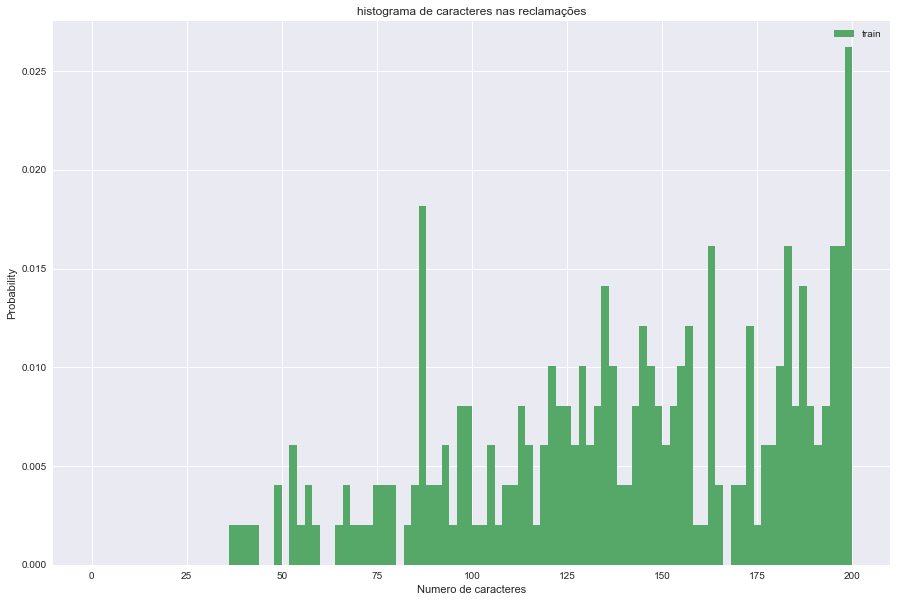

In [35]:
train_qs = pd.Series(df['text'].tolist())
dist_train = train_qs.apply(len)

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=100, range=[0,200], color=pal[1], normed=True, label='train')
plt.title('histograma de caracteres nas reclamações')
plt.legend()
plt.xlabel('Numero de caracteres')
plt.ylabel('Probability')

print('mediana {:.2f}\n desvio {:.2f}\n min {:.2f} \n max {:.2f}'.format(
    dist_train.mean(), 
    dist_train.std(),
    dist_train.min(),
    dist_train.max()))


(-0.5, 1439.5, 1079.5, -0.5)

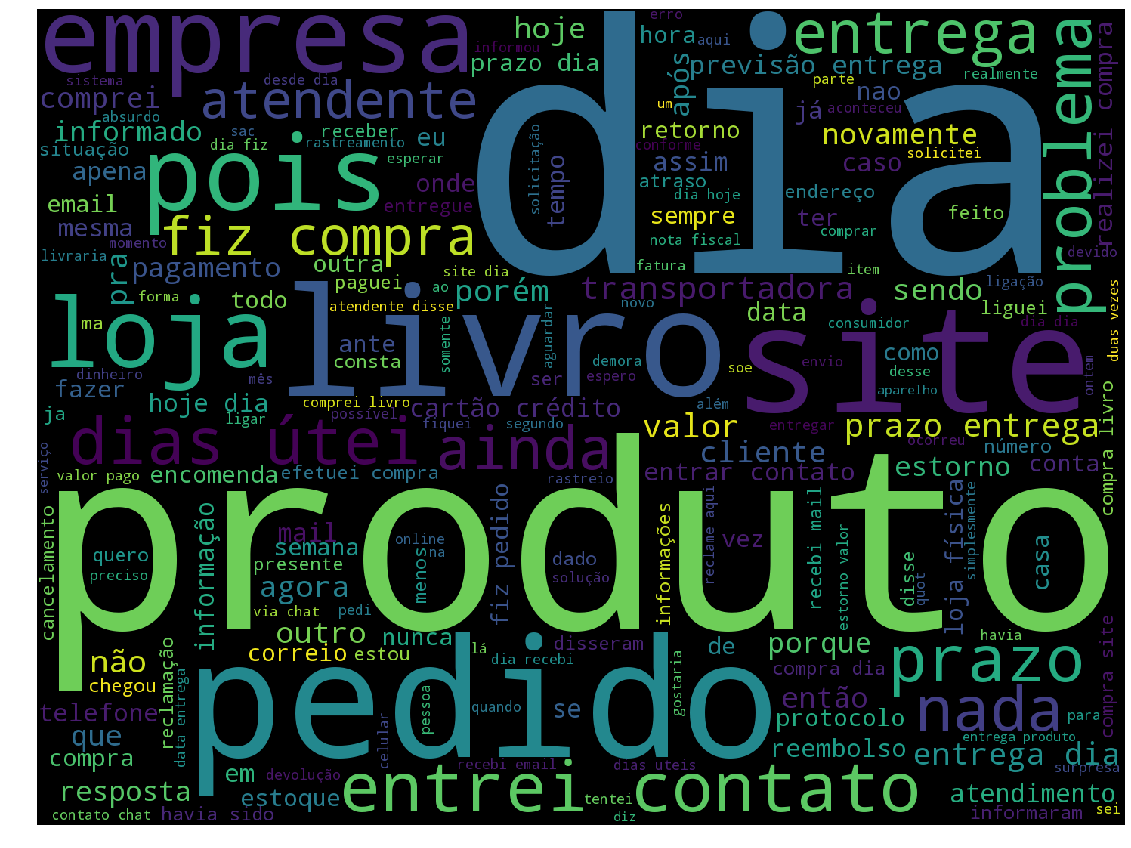

In [36]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['type'])

df['text'] = df['text'].apply(stemm)

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
tf_transformer = TfidfTransformer()
X_train_tfidf = tf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1518, 9034)

In [38]:
clf_logreg = LogisticRegression().fit(X_train_tfidf, Y_train)
clf_nb     = MultinomialNB().fit(X_train_tfidf, Y_train)
clf_sgd    = SGDClassifier().fit(X_train_tfidf, Y_train)

In [39]:
X_test_counts = count_vectorizer.transform(X_test)
X_test_tfidf = tf_transformer.transform(X_test_counts)

pred_logreg = clf_logreg.predict(X_test_tfidf)
pred_nb     = clf_nb.predict(X_test_tfidf)
pred_sgd    = clf_sgd.predict(X_test_tfidf)

In [40]:
print('Logistic Regression: {}, Naive Bayes: {}, SGD: {}'.format(
    clf_logreg.score(X_test_tfidf, Y_test), 
    clf_nb.score(X_test_tfidf, Y_test), 
    clf_sgd.score(X_test_tfidf, Y_test)))

Logistic Regression: 0.8481262327416174, Naive Bayes: 0.6706114398422091, SGD: 0.8520710059171598


In [41]:
def transform_tfidf(sents):
    clean_sents = [ stemm(clean_text(rm_stopwords(s))) for s in sents ]
    print(clean_sents)
    count_vec = CountVectorizer()
    return TfidfTransformer().fit_transform(count_vec.fit_transform(clean_sents))

In [46]:
count_t = count_vectorizer.transform([ 
    'Eu fiz meu pedido faz 10 dias, ta demorando muito!', 
    'Gostaria da devolução do pagamento, o produto não era o que eu esperava',
    'O atendente não me ajudou'])
sentenses = tf_transformer.transform(count_t)
print(clf_logreg.predict(sentenses))
print(clf_logreg.predict_proba(sentenses))

['delay' 'chargeback' 'badservice']


In [51]:
import pickle

def save_model(model, name='cp_a_.pkl'):
    with open(name, 'wb') as m:
        pickle.dump(model, m)
        


In [49]:
save_model(clf_logreg)

In [52]:
save_model(count_vectorizer, 'count_vec.pkl')
save_model(tf_transformer, 'tdifd_trans.pkl')